In [7]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [9]:
x0 = sp.symbols('x0')
#defining a single variable
x2, x3 = sp.symbols('x2, x3') #separated by commas
#defining multiple symbolic variables
m, a = sp.symbols('mass acceleration') #separated by spaces
x, y, z = sp.symbols('x:z') #separated by colons
x4, x5, x6 = sp.symbols('x4:7')

expr = x**2+x*y+3*x*y+4*y**3
force = m * a
print(expr, force, sep='\n')
#combine symbolic variable into expressions

x**2 + 4*x*y + 4*y**3
acceleration*mass


In [10]:
x, y = sp.symbols('x, y')
int1, int2, int3, int5, int7 = sp.symbols('1, 2, 3, 5, 7')
(int2/int5)*sp.E**(x**int2 - y)*sp.cosh(x + y) + (int3/int7)*sp.log(x*y + int1)

2*exp(x**2 - y)*cosh(x + y)/5 + 3*log(1 + x*y)/7

In [11]:
x, y = sp.symbols('x, y')
expr = sp.expand((x + y)**3)
print(expr)
#expands the expression

x**3 + 3*x**2*y + 3*x*y**2 + y**3


In [12]:
expr.subs(y, 2*x)
#substitute symbolic variables

27*x**3

In [13]:
new_expr = expr.subs({x:sp.pi, y:1})
print(new_expr)
#substitutes x with pi and y with 1
new_expr.evalf()
#evaluates new expression

1 + 3*pi + 3*pi**2 + pi**3


71.0398678443373

In [14]:
expr.evalf(subs={x:1, y:2})
#evaluates expression wtih given values

27.0000000000000

In [17]:
f = sp.lambdify(x, sp.sin(x)**2)
print(f(0), f(np.pi/2), f(np.pi), sep='  ')
#converts the expression sin(x)^2 into a callable function, f, with input, x

0.0  1.0  1.4997597826618576e-32


In [18]:
f = sp.lambdify((x, y), sp.sin(x)**2 + sp.cos(y)**2)
print(f(0,1), f(1,0), f(np.pi, np.pi), sep='  ')
#converts an expression of two variables into function, f, with inputs, x and y

0.2919265817264289  1.708073418273571  1.0


In [5]:
def MaclaurinExp(N):
  x, y, n = sp.symbols('x, y, n')
  oldMacExpr = sp.Sum(x**n/sp.factorial(n), (n, 0, N))
  print(oldMacExpr)
  oldMac = sp.lambdify(x, oldMacExpr)
  newMacExpr = oldMacExpr.subs({x:-y**2})
  print(newMacExpr)
  newMac = sp.lambdify(y, newMacExpr)
  domain = np.linspace(-2,2,101)
  rangex = oldMac(domain)
  rangey = newMac(domain)
  plt.plot(domain,rangex)
  plt.plot(domain, rangey)
  plt.show()


Sum(x**n/factorial(n), (n, 0, 100))
Sum((-y**2)**n/factorial(n), (n, 0, 100))


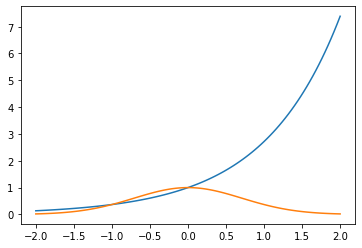

In [15]:
MaclaurinExp(100)

In [19]:
x, y = sp.symbols('x, y')
f = sp.sin(y)*sp.cos(x)**2

df = sp.Derivative(f, x)
print(df)
#make an expression for the derivative of f with respect to x

print(df.doit())
#perform the differentiation

print(sp.diff(f, x))
#calculate the derivative of f with respect to x in one step

print(sp.diff(f, x, y, x))
#calculate the derivative of f with respect to x, then y, then x

Derivative(sin(y)*cos(x)**2, x)
-2*sin(x)*sin(y)*cos(x)
-2*sin(x)*sin(y)*cos(x)
2*(sin(x)**2 - cos(x)**2)*cos(y)


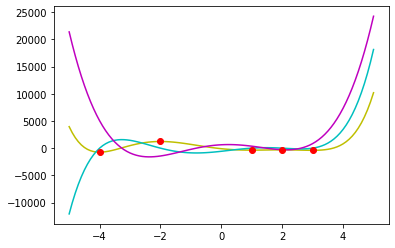

In [58]:
x = sp.symbols('x')
P = 2*x**6 - 51*x**4 + 48*x**3 + 312*x**2 - 576*x - 100
p = sp.lambdify(x, P)
dP = sp.diff(P, x)
dp = sp.lambdify(x, dP)
d2P = sp.diff(dP, x)
d2p = sp.lambdify(x, d2P)

critPoints = []
for n in range(len(domain)):
  if dp(domain[n]) == 0.0:
    critPoints += [domain[n]]
critPoints = np.array(critPoints)
critEval = p(critPoints)

domain = np.linspace(-5,5,101)
rangeP = p(domain)
rangeDP = dp(domain)
rangeD2P = d2p(domain)
plt.plot(domain, rangeP, 'y')
plt.plot(domain, rangeDP, 'c')
plt.plot(domain, rangeD2P, 'm')
plt.plot(critPoints, critEval, 'or')
plt.show()

In [62]:
x, y = sp.symbols('x, y')
F = (x**2 - y**2) / (x**2 + y**2)
dFx = sp.diff(F, x)
dFy = sp.diff(F, y)
print(dFx)
print(dFy)

-2*x*(x**2 - y**2)/(x**2 + y**2)**2 + 2*x/(x**2 + y**2)
-2*y*(x**2 - y**2)/(x**2 + y**2)**2 - 2*y/(x**2 + y**2)


In [63]:
x, y = sp.symbols('x, y')
G = (x*y**2 - x**3)
dGx = sp.diff(G, x)
dGy = sp.diff(G, y)
print(dGx)
print(dGy)

-3*x**2 + y**2
2*x*y


In [64]:
x, y = sp.symbols('x, y')
H = (2*x**2 + 3*x*y + 4*y**2) / (3*x**2 + 5*y**2)
dHx = sp.diff(H, x)
dHy = sp.diff(H, y)
print(dHx)
print(dHy)

-6*x*(2*x**2 + 3*x*y + 4*y**2)/(3*x**2 + 5*y**2)**2 + (4*x + 3*y)/(3*x**2 + 5*y**2)
-10*y*(2*x**2 + 3*x*y + 4*y**2)/(3*x**2 + 5*y**2)**2 + (3*x + 8*y)/(3*x**2 + 5*y**2)
